<a href="https://colab.research.google.com/github/hernandezhdd/Machine-Learning-Stanford/blob/main/ex6-Support-Vector-Machines-and-Spam-Classifier/06-ex6-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6: Support Vector Machines

### Instructions: 
Run the first cell to install the Octave kernel. After it installs, go to "Runtime/Entorno de ejecucion" and select "Change runtime type/Cambiar entorno de ejecucion". On the pop-up window select Octave and press Save, this will restart the kernel to use Octave.


### Octave Kernel Installation

In [ ]:
!sudo apt-get update
!apt install octave liboctave-dev
!pip install octave_kernel
!python -m octave_kernel install --user

### Download files from Exercise 4 GitHub folder

Run the next two cells to download the necessary function files, scripts and datasets.

In [ ]:
!apt install subversion

In [ ]:
!svn checkout https://github.com/hernandezhdd/Machine-Learning-Stanford/trunk/ex6-Support-Vector-Machines-and-Spam-Classifier

%download containers function for Octave
!mkdir ../content/+containers
!wget -P ../content/+containers http://hg.savannah.gnu.org/hgweb/octave/raw-file/b04466113212/scripts/%2Bcontainers/Map.m

### Move files to /content folder

In [ ]:
!mv  -v ../content/ex6-Support-Vector-Machines-and-Spam-Classifier/* ../content/

In [2]:
%% Machine Learning Online Class
%  Exercise 6 | Support Vector Machines
%
%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the
%  exercise. You will need to complete the following functions:
%
%     gaussianKernel.m
%     dataset3Params.m
%     processEmail.m
%     emailFeatures.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc
graphics_toolkit ("gnuplot");
page_output_immediately(1);

In [3]:
%% =============== Part 1: Loading and Visualizing Data ================
%  We start the exercise by first loading and visualizing the dataset. 
%  The following code will load the dataset into your environment and plot
%  the data.
%

fprintf('Loading and Visualizing Data ...\n')

% Load from ex6data1: 
% You will have X, y in your environment
load('ex6data1.mat');

Loading and Visualizing Data ...


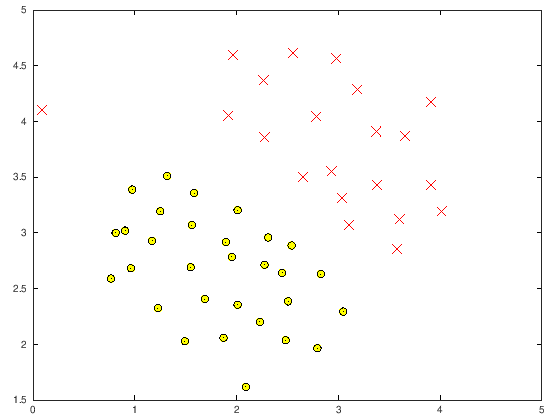

In [4]:
% Plot training data
plotData(X, y);

In [5]:
%% ==================== Part 2: Training Linear SVM ====================
%  The following code will train a linear SVM on the dataset and plot the
%  decision boundary learned.
%

% Load from ex6data1: 
% You will have X, y in your environment
load('ex6data1.mat');

fprintf('\nTraining Linear SVM ...\n')

% You should try to change the C value below and see how the decision
% boundary varies (e.g., try C = 1000)
C = 1;
model = svmTrain(X, y, C, @linearKernel, 1e-3, 20);


Training Linear SVM ...

Training ......................................................................
......... Done! 



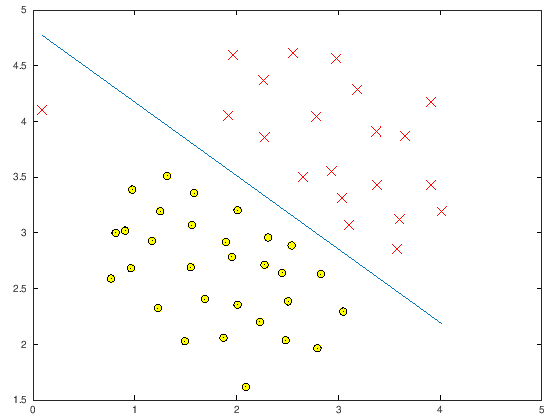

In [6]:
visualizeBoundaryLinear(X, y, model);

In [7]:
%% ==================== Part 2: Training Linear SVM ====================
%  The following code will train a linear SVM on the dataset and plot the
%  decision boundary learned.
%

% Load from ex6data1: 
% You will have X, y in your environment
load('ex6data1.mat');

fprintf('\nTraining Linear SVM ...\n')

% You should try to change the C value below and see how the decision
% boundary varies (e.g., try C = 1000)
C = 1000;
model = svmTrain(X, y, C, @linearKernel, 1e-3, 20);


Training Linear SVM ...

















...............................................................................
........................................................ Done! 



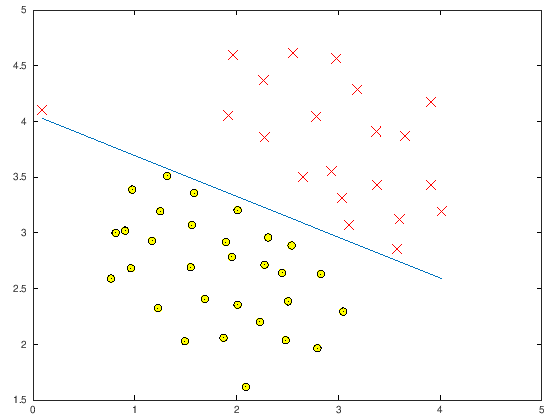

In [8]:
visualizeBoundaryLinear(X, y, model);

In [9]:
% You should try to change the C value below and see how the decision
% boundary varies (e.g., try C = 1000)
addpath("../content/");
savepath;
models = containers.Map(); 

cVec = [0.1 1 10 100];

for C=cVec
    models(num2str(C)) = svmTrain(X, y, C, @linearKernel, 1e-3, 20);
end






























...............................................................................
.......................... Done! 



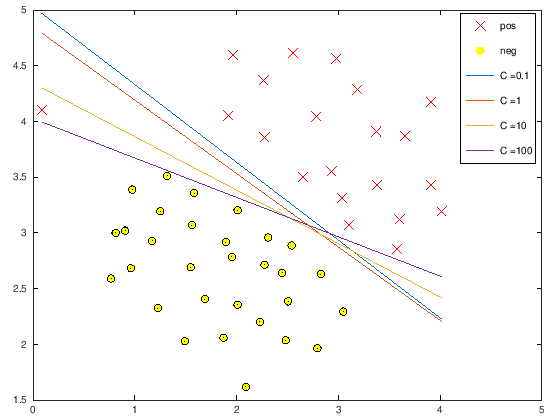

In [10]:
cVecStr = num2str([]);
plotData(X, y);

for C=cVec

cVecStr = [cVecStr; strcat('C = ',num2str(C))];

hold on
model = models(num2str(C));
w = model.w;
b = model.b;
xp = linspace(min(X(:,1)), max(X(:,1)), 100);
yp = - (w(1)*xp + b)/w(2);
%plot(xp, yp, '-b'); 
plot(xp, yp); 
hold off

end

legend(['pos' ;'neg'; cVecStr])

In [11]:
%% =============== Part 3: Implementing Gaussian Kernel ===============
%  You will now implement the Gaussian kernel to use
%  with the SVM. You should complete the code in gaussianKernel.m
%
fprintf('\nEvaluating the Gaussian Kernel ...\n')

x1 = [1 2 1]; x2 = [0 4 -1]; sigma = 2;
sim = gaussianKernel(x1, x2, sigma);

fprintf(['Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = %f :' ...
         '\n\t%f\n(for sigma = 2, this value should be about 0.324652)\n'], sigma, sim);


Evaluating the Gaussian Kernel ...
Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2.000000 :
	0.324652
(for sigma = 2, this value should be about 0.324652)


In [12]:
%% =============== Part 4: Visualizing Dataset 2 ================
%  The following code will load the next dataset into your environment and 
%  plot the data. 
%

fprintf('Loading and Visualizing Data ...\n')

% Load from ex6data2: 
% You will have X, y in your environment
load('ex6data2.mat');

Loading and Visualizing Data ...


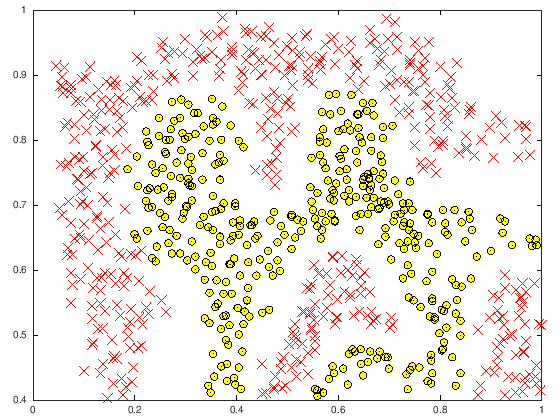

In [13]:
% Plot training data
plotData(X, y);


Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...






...............................................................................
.................................... Done! 



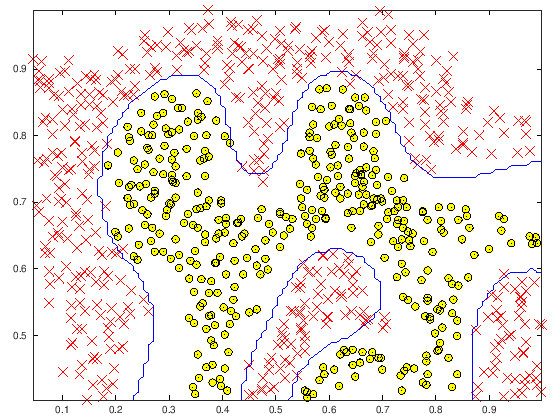

In [14]:
%% ========== Part 5: Training SVM with RBF Kernel (Dataset 2) ==========
%  After you have implemented the kernel, we can now use it to train the 
%  SVM classifier.
% 
fprintf('\nTraining SVM with RBF Kernel (this may take 1 to 2 minutes) ...\n');

% Load from ex6data2: 
% You will have X, y in your environment
load('ex6data2.mat');

% SVM Parameters
C = 1; sigma = 0.1;

% We set the tolerance and max_passes lower here so that the code will run
% faster. However, in practice, you will want to run the training to
% convergence.

model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma)); 
visualizeBoundary(X, y, model);

    image>__img__ at line 166 column 9
    image at line 117 column 10
    imagesc at line 98 column 12


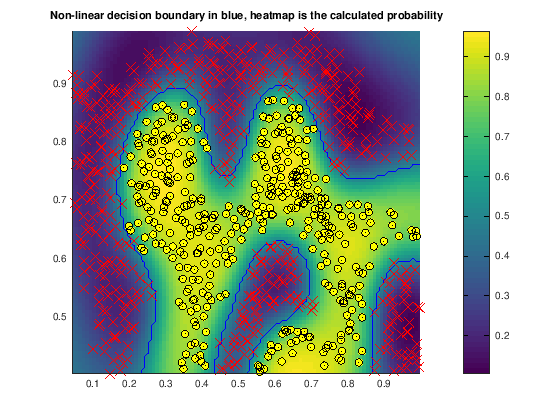

In [15]:
%VISUALIZEBOUNDARY plots a non-linear decision boundary learned by the SVM
%   VISUALIZEBOUNDARYLINEAR(X, y, model) plots a non-linear decision 
%   boundary learned by the SVM and overlays the data on it

% Plot the training data on top of the boundary
% plotData(X, y)

% Make classification predictions over a grid of values
x1plot = linspace(min(X(:,1)), max(X(:,1)), 100)';
x2plot = linspace(min(X(:,2)), max(X(:,2)), 100)';
[X1, X2] = meshgrid(x1plot, x2plot);
vals = zeros(size(X1));
probs = zeros(size(X1));
for i = 1:size(X1, 2)
   this_X = [X1(:, i), X2(:, i)];
   [vals(:, i), probs(:, i)] = svmPredict(model, this_X);
end

% Plot the SVM boundary
hold on
imagesc(X1, X2, probs)%, [0.5 0.5]);
contour(X1, X2, vals, [0.5 0.5], 'b');
colorbar()
plotData(X, y)
ylim([min(X(:,2)), max(X(:,2))])
xlim([min(X(:,1)), max(X(:,1))])
title('Non-linear decision boundary in blue, heatmap is the calculated probability')
hold off;

In [16]:
min(X(:,1)), max(X(:,1)), min(X(:,2)), max(X(:,2))


ans =  0.044931
ans =  0.99885
ans =  0.40263
ans =  0.98860


    image>__img__ at line 166 column 9
    image at line 117 column 10
    imagesc at line 98 column 12


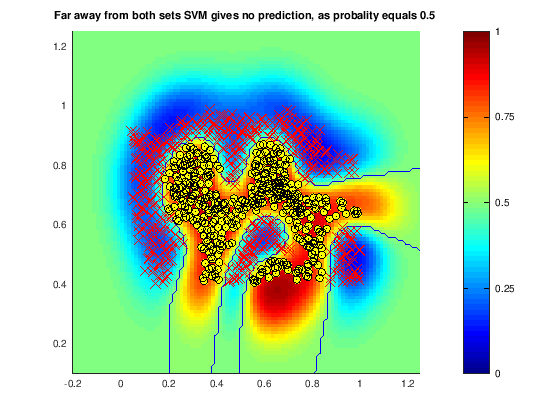

In [17]:
%VISUALIZEBOUNDARY plots a non-linear decision boundary learned by the SVM
%   VISUALIZEBOUNDARYLINEAR(X, y, model) plots a non-linear decision 
%   boundary learned by the SVM and overlays the data on it

% Plot the training data on top of the boundary
% plotData(X, y)

% Make classification predictions over a grid of values
% x1plot = linspace(min(X(:,1)), max(X(:,1)), 100)';
% x2plot = linspace(min(X(:,2)), max(X(:,2)), 100)';
x1plot = linspace(-0.2, 1.25, 100)';
x2plot = linspace(0.1, 1.25, 100)';
[X1, X2] = meshgrid(x1plot, x2plot);
vals = zeros(size(X1));
probs = zeros(size(X1));
for i = 1:size(X1, 2)
   this_X = [X1(:, i), X2(:, i)];
   [vals(:, i), probs(:, i)] = svmPredict(model, this_X);
end

% Plot the SVM boundary
hold on
imagesc(X1, X2, probs)%, [0.5 0.5]);
contour(X1, X2, vals, [0.5 0.5], 'b');
cb = colorbar(); 
% set(cb, 'ylim', [0 1])
caxis([0 1])
set(cb,'YTick',0:0.25:1)
colormap('jet')
plotData(X, y)

title('Far away from both sets SVM gives no prediction, as probality equals 0.5 ')
hold off;

In [18]:
%% =============== Part 6: Visualizing Dataset 3 ================
%  The following code will load the next dataset into your environment and 
%  plot the data. 
%

fprintf('Loading and Visualizing Data ...\n')

% Load from ex6data3: 
% You will have X, y in your environment
load('ex6data3.mat');

Loading and Visualizing Data ...


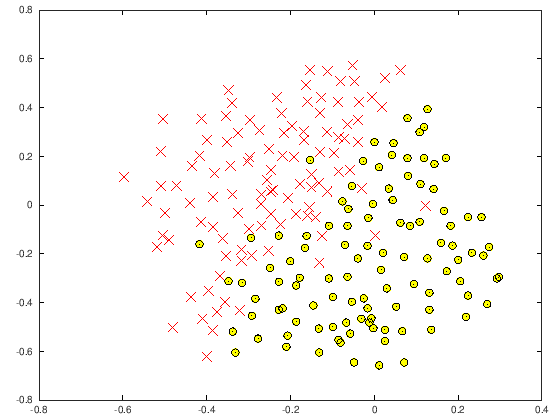

In [19]:
% Plot training data
plotData(X, y);

In [ ]:
%% ========== Part 7: Training SVM with RBF Kernel (Dataset 3) ==========

%  This is a different dataset that you can use to experiment with. Try
%  different values of C and sigma here.
% 

% Load from ex6data3: 
% You will have X, y in your environment
load('ex6data3.mat');

C=0;
sigma=3;

% Try different SVM Parameters here
[C, sigma, errorsVec] = dataset3Params(X, y, Xval, yval);

In [21]:
printf('Best C and sigma '), disp([C, sigma])

Best C and sigma    1.00000   0.10000





...............................................................................
................................................ Done! 



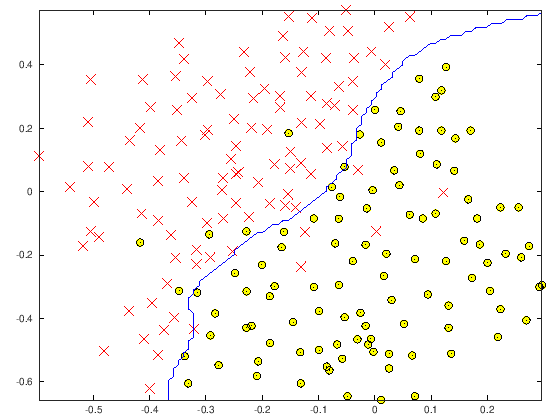

In [22]:
% Train the SVM
model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma));
visualizeBoundary(X, y, model);

In [23]:
errorsVec

errorsVec =

   1.0000e-02   1.0000e-02   5.6500e-01
   1.0000e-01   1.0000e-02   5.6500e-01
   1.0000e+00   1.0000e-02   5.6500e-01
   1.0000e+01   1.0000e-02   5.6500e-01
   1.0000e+02   1.0000e-02   5.6500e-01
   1.0000e-02   1.0000e-01   4.5000e-02
   1.0000e-01   1.0000e-01   4.5000e-02
   1.0000e+00   1.0000e-01   3.0000e-02
   1.0000e+01   1.0000e-01   7.0000e-02
   1.0000e+02   1.0000e-01   6.5000e-02
   1.0000e-02   1.0000e+00   1.8500e-01
   1.0000e-01   1.0000e+00   1.7000e-01
   1.0000e+00   1.0000e+00   8.0000e-02
   1.0000e+01   1.0000e+00   9.5000e-02
   1.0000e+02   1.0000e+00   2.2000e-01
   1.0000e-02   1.0000e+01   1.8000e-01
   1.0000e-01   1.0000e+01   1.8000e-01
   1.0000e+00   1.0000e+01   1.8000e-01
   1.0000e+01   1.0000e+01   1.5500e-01
   1.0000e+02   1.0000e+01   8.0000e-02
   1.0000e-02   1.0000e+02   1.8000e-01
   1.0000e-01   1.0000e+02   1.8000e-01
   1.0000e+00   1.0000e+02   1.8000e-01
   1.0000e+01   1.0000e+02   1.8000e-01
   1.0000e+02   1.0000e+02 

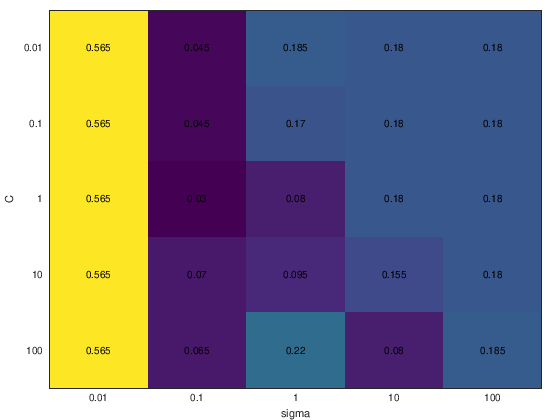

In [24]:
% https://www.mathworks.com/matlabcentral/answers/99917-how-can-i-label-each-pixel-of-the-output-of-imagesc-with-its-value
N = 5;
vec = [0.01, 0.1, 1, 10, 100];
M = reshape(errorsVec(:,3), N,N);
xmat = repmat(1:N,N,1); % generate x-coordinates
ymat = xmat'; % generate y-coordinates
% Generate Labels
t = num2cell(M); % extract values into cells
t = cellfun(@num2str, t, 'UniformOutput', false); % convert to string
% Draw Image and Label Pixels
% imagesc(xmat,ymat,M)
imagesc(M)

% set(gca, 'YScale', 'log')
% set(gca, 'XScale', 'log')
text(xmat(:), ymat(:), t, 'HorizontalAlignment', 'Center')

set(gca,'XTick',1:N,...
    'XTickLabel', vec,...
    'YTick',1:N,...
    'YTickLabel',vec,...
    'TickLength',[0 0]);
xlabel('sigma');
ylabel('C');

    legend at line 432 column 9


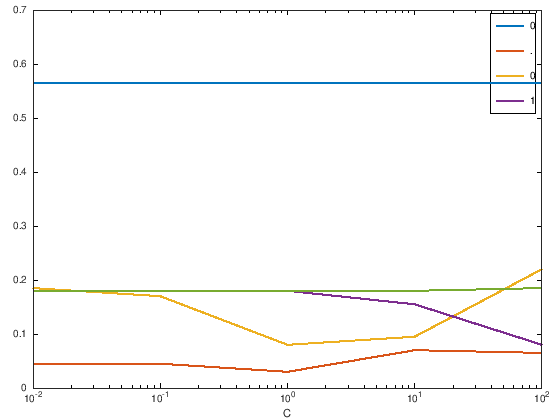

In [25]:
vec = [0.01, 0.1, 1, 10, 100];
semilogx(vec,M,'linewidth',4)
xlabel('C')
legend([num2str(vec)]')

In [ ]:
%DATASET3PARAMS returns your choice of C and sigma for Part 3 of the exercise
%where you select the optimal (C, sigma) learning parameters to use for SVM
%with RBF kernel
%   [C, sigma] = DATASET3PARAMS(X, y, Xval, yval) returns your choice of C and 
%   sigma. You should complete this function to return the optimal C and 
%   sigma based on a cross-validation set.
%

% You need to return the following variables correctly.
%C = 1;
%sigma = 0.3;

% ====================== YOUR CODE HERE ======================
% Instructions: Fill in this function to return the optimal C and sigma
%               learning parameters found using the cross validation set.
%               You can use svmPredict to predict the labels on the cross
%               validation set. For example, 
%                   predictions = svmPredict(model, Xval);
%               will return the predictions on the cross validation set.
%
%  Note: You can compute the prediction error using 
%        mean(double(predictions ~= yval))
%

% You should try to change the C value below and see how the decision
% boundary varies (e.g., try C = 1000)

models = containers.Map(); 
preds = containers.Map(); 
val_errors = containers.Map(); 

%cVec = [0.1, 0.3, 1, 3, 10];
cVec = [0.1*(2).**(0:6) 10];
sigmaVec = [0.01*(2).**(0:6) 1];

errorsVec = [];

for sigma_i = sigmaVec

    for C_i = cVec
        
        printf('Training for C and sigma '), disp([C_i, sigma_i])
        
        model = svmTrain(X, y, C_i, @(x1, x2) gaussianKernel(x1, x2, sigma_i));
        
        models(strcat(num2str(C_i),',', num2str(sigma_i))) = model;
        
        predictions = svmPredict(model, Xval);
        
        preds(strcat(num2str(C_i),',', num2str(sigma_i))) = predictions;
        
        val_errors(strcat(num2str(C_i),',', num2str(sigma_i))) = mean(double(predictions ~= yval));
        
        errorsVec = [errorsVec; [C_i, sigma_i, mean(double(predictions ~= yval))] ];
    end
end

% find min value of val_errors 
% from mathworks
%https://www.mathworks.com/matlabcentral/answers/98444-how-can-i-retrieve-the-key-which-belongs-to-a-specified-value-using-the-array-containers-map-in-matl

testvalue = min([values(val_errors){:} ]);

testind = cellfun(@(x)isequal(x,testvalue), values(val_errors) );

testkeys = keys(val_errors);

msg_key = testkeys(testind){1};

C = str2num( strsplit (msg_key, ","){1});
sigma = str2num(strsplit (msg_key, ","){2});

% =========================================================================

In [27]:
disp(['Best C ', num2str(C), ' and sigma ', num2str(sigma)])

Best C 0.4 and sigma 0.08


In [28]:
errorsVec

errorsVec =

    0.100000    0.010000    0.565000
    0.200000    0.010000    0.565000
    0.400000    0.010000    0.565000
    0.800000    0.010000    0.565000
    1.600000    0.010000    0.565000
    3.200000    0.010000    0.565000
    6.400000    0.010000    0.565000
   10.000000    0.010000    0.565000
    0.100000    0.020000    0.565000
    0.200000    0.020000    0.565000
    0.400000    0.020000    0.565000
    0.800000    0.020000    0.565000
    1.600000    0.020000    0.565000
    3.200000    0.020000    0.565000
    6.400000    0.020000    0.565000
   10.000000    0.020000    0.565000
    0.100000    0.040000    0.050000
    0.200000    0.040000    0.050000
    0.400000    0.040000    0.050000
    0.800000    0.040000    0.055000
    1.600000    0.040000    0.065000
    3.200000    0.040000    0.065000
    6.400000    0.040000    0.080000
   10.000000    0.040000    0.080000
    0.100000    0.080000    0.035000
    0.200000    0.080000    0.035000
    0.400000    0.080000 

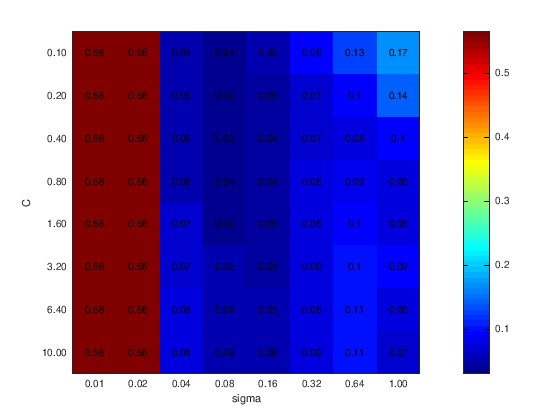

In [29]:
% https://www.mathworks.com/matlabcentral/answers/99917-how-can-i-label-each-pixel-of-the-output-of-imagesc-with-its-value
N = length(cVec);
M = reshape(errorsVec(:,3), N,N);
xmat = repmat(1:N,N,1); % generate x-coordinates
ymat = xmat'; % generate y-coordinates
% Generate Labels
t = num2cell(round(M * 100) ./ 100); % extract values into cells

t = cellfun(@num2str, t, 'UniformOutput', false); % convert to string
% t = round(t);
% Draw Image and Label Pixels
% imagesc(xmat,ymat,M)
imagesc(M)

% set(gca, 'YScale', 'log')
% set(gca, 'XScale', 'log')
% text(xmat(:), ymat(:), t, 'HorizontalAlignment', 'Center')
text(xmat(:), ymat(:), t, 'HorizontalAlignment', 'Center')

set(gca,'XTick',1:N,...
    'XTickLabel', sigmaVec,...
    'YTick',1:N,...
    'YTickLabel',cVec,...
    'TickLength',[0 0]);
set(gca,'xticklabel',cellstr (num2str (sigmaVec (:), "%.2f")))
set(gca,'yticklabel',cellstr (num2str (cVec (:), "%.2f")))
colormap('jet')
colorbar()
xlabel('sigma');
ylabel('C');

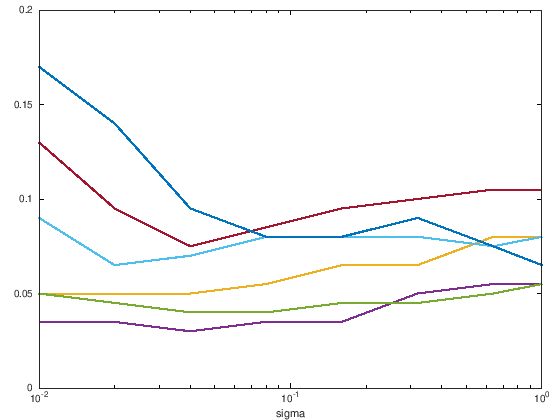

In [30]:
semilogx(sigmaVec,M,'linewidth',4)
xlabel('sigma')
ylim([0 0.2])
% legend([num2str(vec)]')

In [31]:
%Best parameters
C=0.4, sigma=0.08

C =  0.40000
sigma =  0.080000


In [32]:
% Train the SVM
model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma));




...............................................................................
...................................................... Done! 



Best model found using cross validation


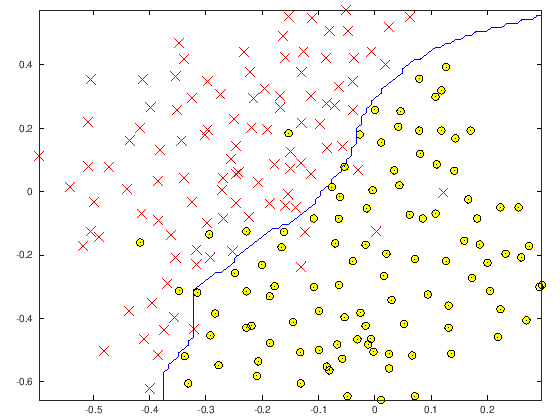

In [33]:
disp('Best model found using cross validation')
visualizeBoundary(X, y, model);

In [34]:
#Checking performance of different implementations

%Calculation of gaussian kernel element-wise 
m = length(X);
K0 = zeros(m);
tic
for i = 1:m
    for j = i:m
     K0(i,j) = gaussianKernel(X(i,:)', X(j,:)',sigma);
     K0(j,i) = K0(i,j); %the matrix is symmetric
    end
end
toc

Elapsed time is 1.15797 seconds.


In [44]:
% Own vectorized calculation of gaussian kernel

disp('Vectorized calculation of gaussian kernel')
tic
Xnd1 = reshape(X,size(X)(1),1,size(X)(2))-reshape(X,1,size(X)(1),size(X)(2));
XndT = reshape(X,1,size(X)(1),size(X)(2));
XndMinusXndT = (Xnd1 - XndT);
dist = sum(XndMinusXndT.**2,3);
kern = exp ( - 0.5 * dist / sigma.**2);
% kern(:,1:6)
toc
disp('Vectorized calculation is five times faster')

Vectorized calculation of gaussian kernel
Elapsed time is 0.0159249 seconds.
Vectorized calculation is five times faster


In [45]:
% Vectorized RBF Kernel
% This is equivalent to computing the kernel on every pair of examples
tic
X2 = sum(X.^2, 2);
K = bsxfun(@plus, X2, bsxfun(@plus, X2', - 2 * (X * X')));
K = gaussianKernel(1, 0,sigma) .^ K;
toc
disp('This implementation is ten times faster than element-wise')

Elapsed time is 0.0215931 seconds.
This implementation is ten times faster than element-wise


Checking that all implementations give the same results
Identity function means that K, K0 and kern are the same


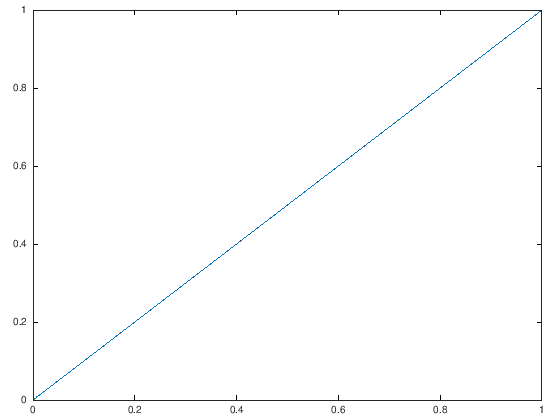

In [46]:
disp('Checking that all implementations give the same results')
plot(K,kern)
plot(K,K0)
xlim([0 1])
ylim([0 1])
disp('Identity function means that K, K0 and kern are the same')

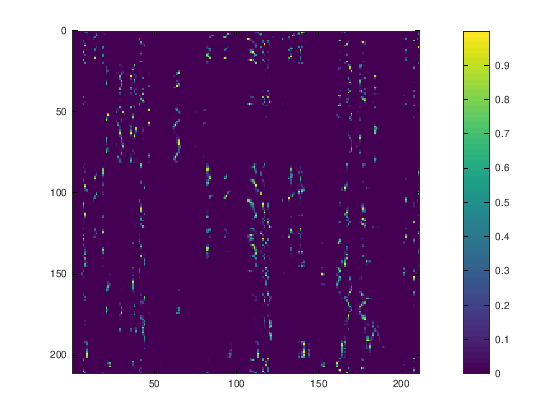

In [47]:
imagesc((kern))
% caxis([-4 0])
colorbar()

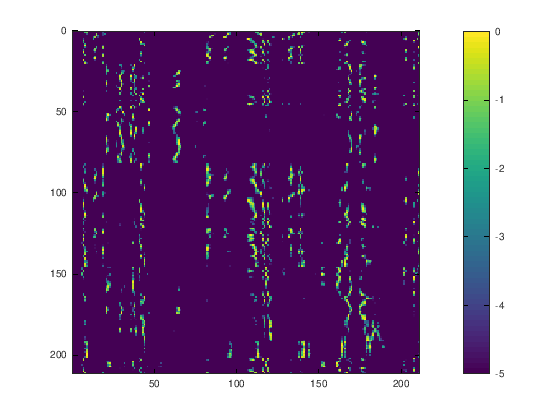

In [48]:
imagesc(log(kern))
caxis([-5 0])
colorbar()